importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

reading dataset

In [3]:
crop=pd.read_csv("/content/drive/MyDrive/archive (3) (1)/Crop_recommendation.csv")

reading dataset directly from kaggle

In [4]:
!kaggle datasets download -d atharvaingle/crop-recommendation-dataset

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [5]:
!unzip -q archive1.zip -d dataset

unzip:  cannot find or open archive1.zip, archive1.zip.zip or archive1.zip.ZIP.


In [6]:
!ls dataset

ls: cannot access 'dataset': No such file or directory


mounting drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
crop.shape

(2200, 8)

In [9]:
crop.duplicated().sum()


0

In [10]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [11]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [12]:
crop.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [13]:
crop.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [14]:
crop.duplicated().sum()

0

In [15]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [16]:
corr=crop.corr()
corr

<ipython-input-16-a9d38c7394d1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=crop.corr()


,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


<Axes: >

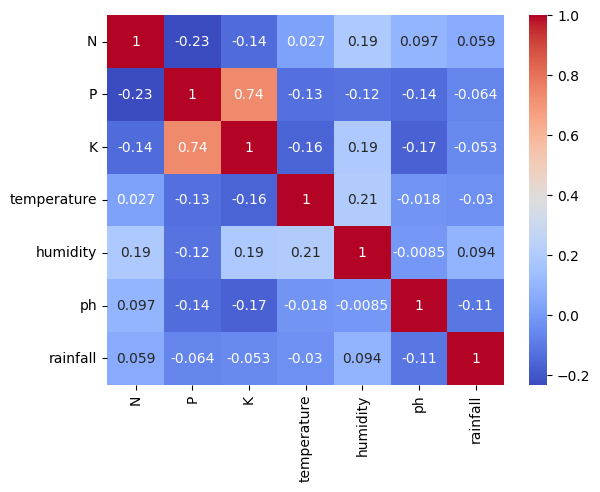

In [17]:
import seaborn as sns
sns.heatmap(corr,annot=True,cbar=True,cmap='coolwarm')

In [18]:
crop

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [19]:
crop['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [20]:
crop_dict={
    'rice':1,
    'maize':2,
    'jute':3,
    'cotton':4,
    'coconut':5,
    'papaya':6,
    'orange':7,
    'apple':8,
    'muskmelon':9,
    'watermelon':10,
    'grapes':11,
    'mango':12,
    'banana':13,
    'pomogranate':14,
    'lentil':15,
    'blackgram':16,
    'mungbean':17,
    'mothbeans':18,
    'pigeonpeas':19,
    'kidneybeans':20,
    'chickpea':21,
    'coffee':22,

}
crop['crop_num']=crop['label'].map(crop_dict)

In [21]:
crop['crop_num'].value_counts()

1.0     100
11.0    100
3.0     100
4.0     100
5.0     100
6.0     100
7.0     100
8.0     100
9.0     100
10.0    100
12.0    100
2.0     100
13.0    100
15.0    100
16.0    100
17.0    100
18.0    100
19.0    100
20.0    100
21.0    100
22.0    100
Name: crop_num, dtype: int64

In [22]:
crop.drop('label',axis = 1,inplace = True)
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,crop_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,1.0
1,85,58,41,21.770462,80.319644,7.038096,226.655537,1.0
2,60,55,44,23.004459,82.320763,7.840207,263.964248,1.0
3,74,35,40,26.491096,80.158363,6.980401,242.864034,1.0
4,78,42,42,20.130175,81.604873,7.628473,262.717340,1.0


In [23]:
x = crop.drop('crop_num',axis = 1)
y = crop['crop_num']

In [24]:
x.shape

(2200, 7)

In [25]:
y.shape

(2200,)

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [28]:
x_train.shape

(1760, 7)

In [29]:
x_test.shape

(440, 7)

In [30]:
y_train.shape

(1760,)

In [31]:
y_test.shape

(440,)

In [32]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()

ms.fit(x_train)
x_train = ms.transform(x_train)
x_test = ms.transform(x_test)

In [33]:
x_train

array([[0.12142857, 0.07857143, 0.045     , ..., 0.9089898 , 0.48532225,
        0.29685161],
       [0.26428571, 0.52857143, 0.07      , ..., 0.64257946, 0.56594073,
        0.17630752],
       [0.05      , 0.48571429, 0.1       , ..., 0.57005802, 0.58835229,
        0.08931844],
       ...,
       [0.07857143, 0.22142857, 0.13      , ..., 0.43760347, 0.46198144,
        0.28719815],
       [0.07857143, 0.85      , 0.995     , ..., 0.76763665, 0.44420505,
        0.18346657],
       [0.22857143, 0.52142857, 0.085     , ..., 0.56099735, 0.54465022,
        0.11879596]])

In [34]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

sc.fit(x_train)
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

In [35]:
x_train

array([[-9.03426596e-01, -1.12616170e+00, -6.68506601e-01, ...,
         9.36586183e-01,  1.93473784e-01,  5.14970176e-03],
       [-3.67051340e-01,  7.70358846e-01, -5.70589522e-01, ...,
        -1.00470485e-01,  8.63917548e-01, -6.05290566e-01],
       [-1.17161422e+00,  5.89737842e-01, -4.53089028e-01, ...,
        -3.82774991e-01,  1.05029771e+00, -1.04580687e+00],
       ...,
       [-1.06433917e+00, -5.24091685e-01, -3.35588533e-01, ...,
        -8.98381379e-01, -6.34357580e-04, -4.37358211e-02],
       [-1.06433917e+00,  2.12501638e+00,  3.05234239e+00, ...,
         3.86340190e-01, -1.48467347e-01, -5.69036842e-01],
       [-5.01145154e-01,  7.40255346e-01, -5.11839275e-01, ...,
        -4.18045489e-01,  6.86860180e-01, -8.96531475e-01]])

In [36]:
x_test

array([[ 1.34934948, -1.0960582 , -0.02225388, ...,  1.05232434,
        -0.37619899, -1.38984486],
       [ 1.26889319, -1.36698971,  0.05607978, ...,  0.67956909,
        -0.28013033, -0.96895253],
       [ 0.22296144,  0.25859933,  0.01691295, ...,  0.98974316,
         0.60209743,  0.22056087],
       ...,
       [ 1.88572474, -0.19295318, -0.62933977, ...,  0.35134079,
         1.61311363, -0.54905776],
       [ 1.75163092, -0.04243567, -0.57058952, ...,  0.1731198 ,
        -0.46741089, -0.64767698],
       [-1.22525175,  0.43922034, -0.55100611, ..., -1.74645651,
        -0.45817577,  0.95946086]])

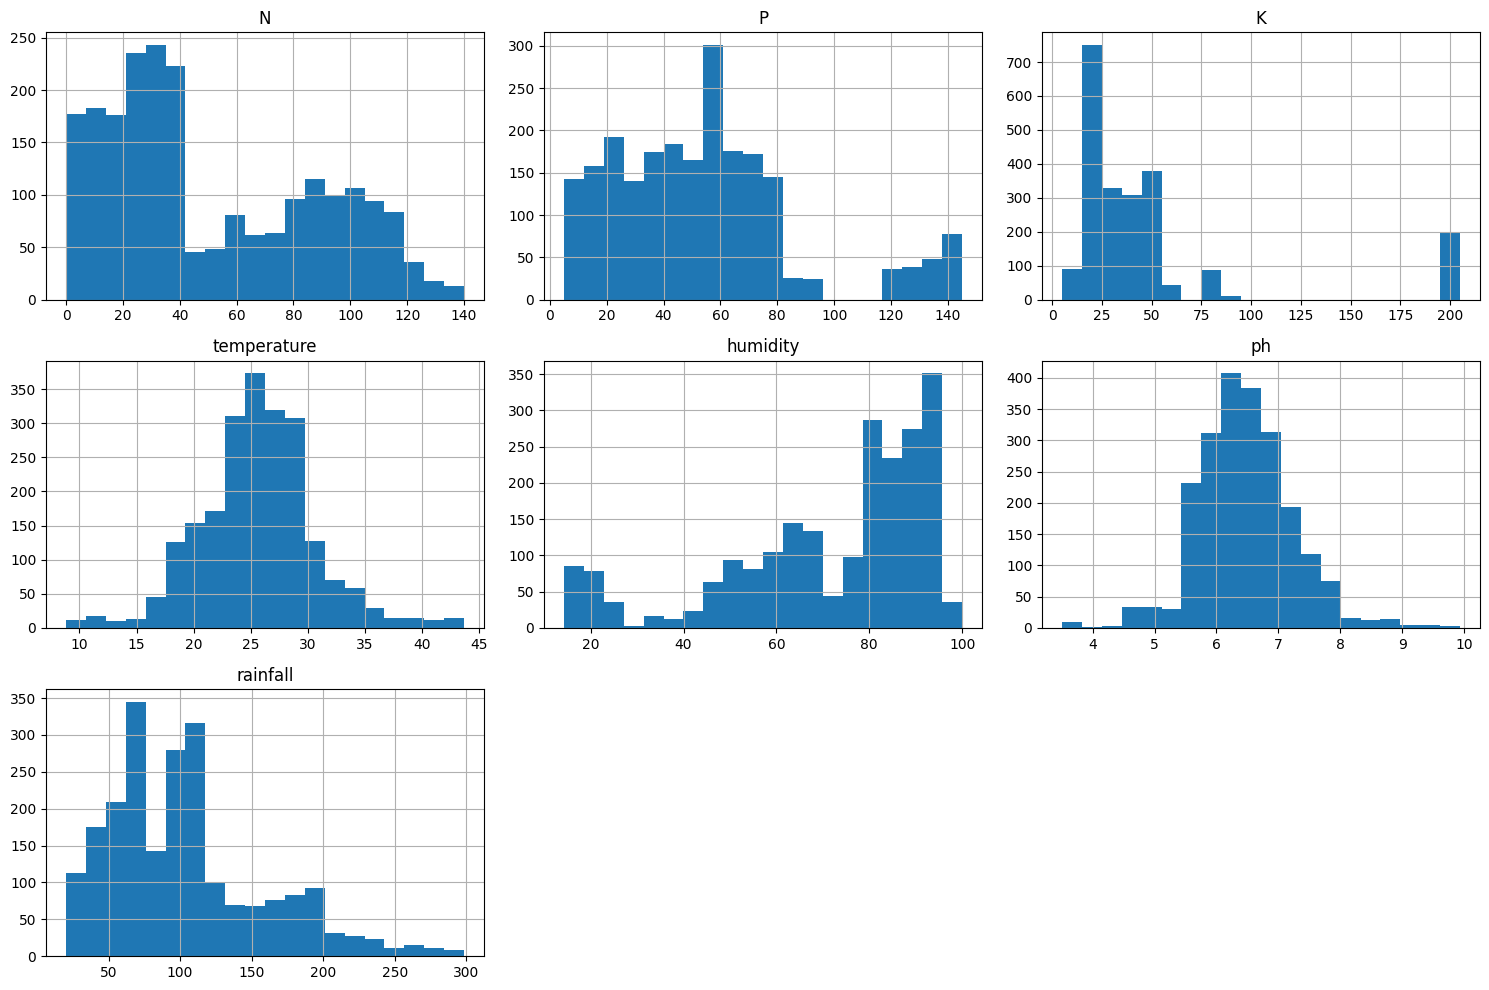

In [37]:
import matplotlib.pyplot as plt

# Assuming 'x' is your feature matrix DataFrame
x.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()


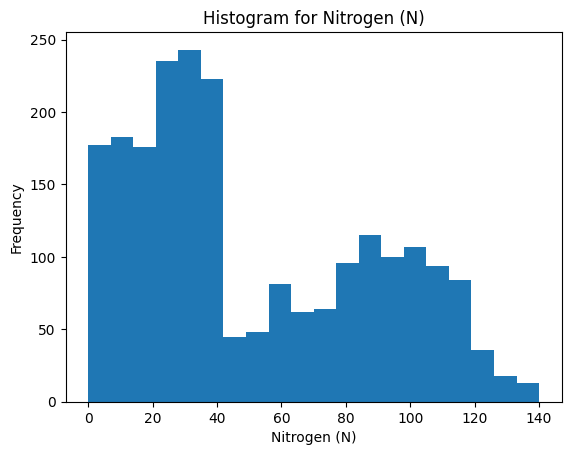

In [38]:
import matplotlib.pyplot as plt

# Example: Histogram for the 'N' column
plt.hist(x['N'], bins=20)
plt.title('Histogram for Nitrogen (N)')
plt.xlabel('Nitrogen (N)')
plt.ylabel('Frequency')
plt.show()


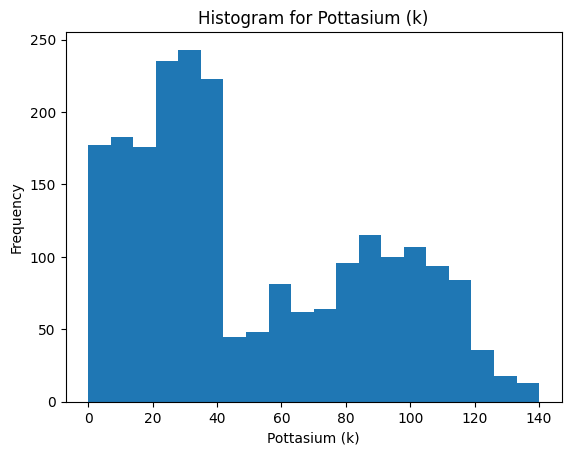

In [40]:
import matplotlib.pyplot as plt

# Example: Histogram for the 'N' column
plt.hist(x['N'], bins=20)
plt.title('Histogram for Pottasium (k)')
plt.xlabel('Pottasium (k)')
plt.ylabel('Frequency')
plt.show()


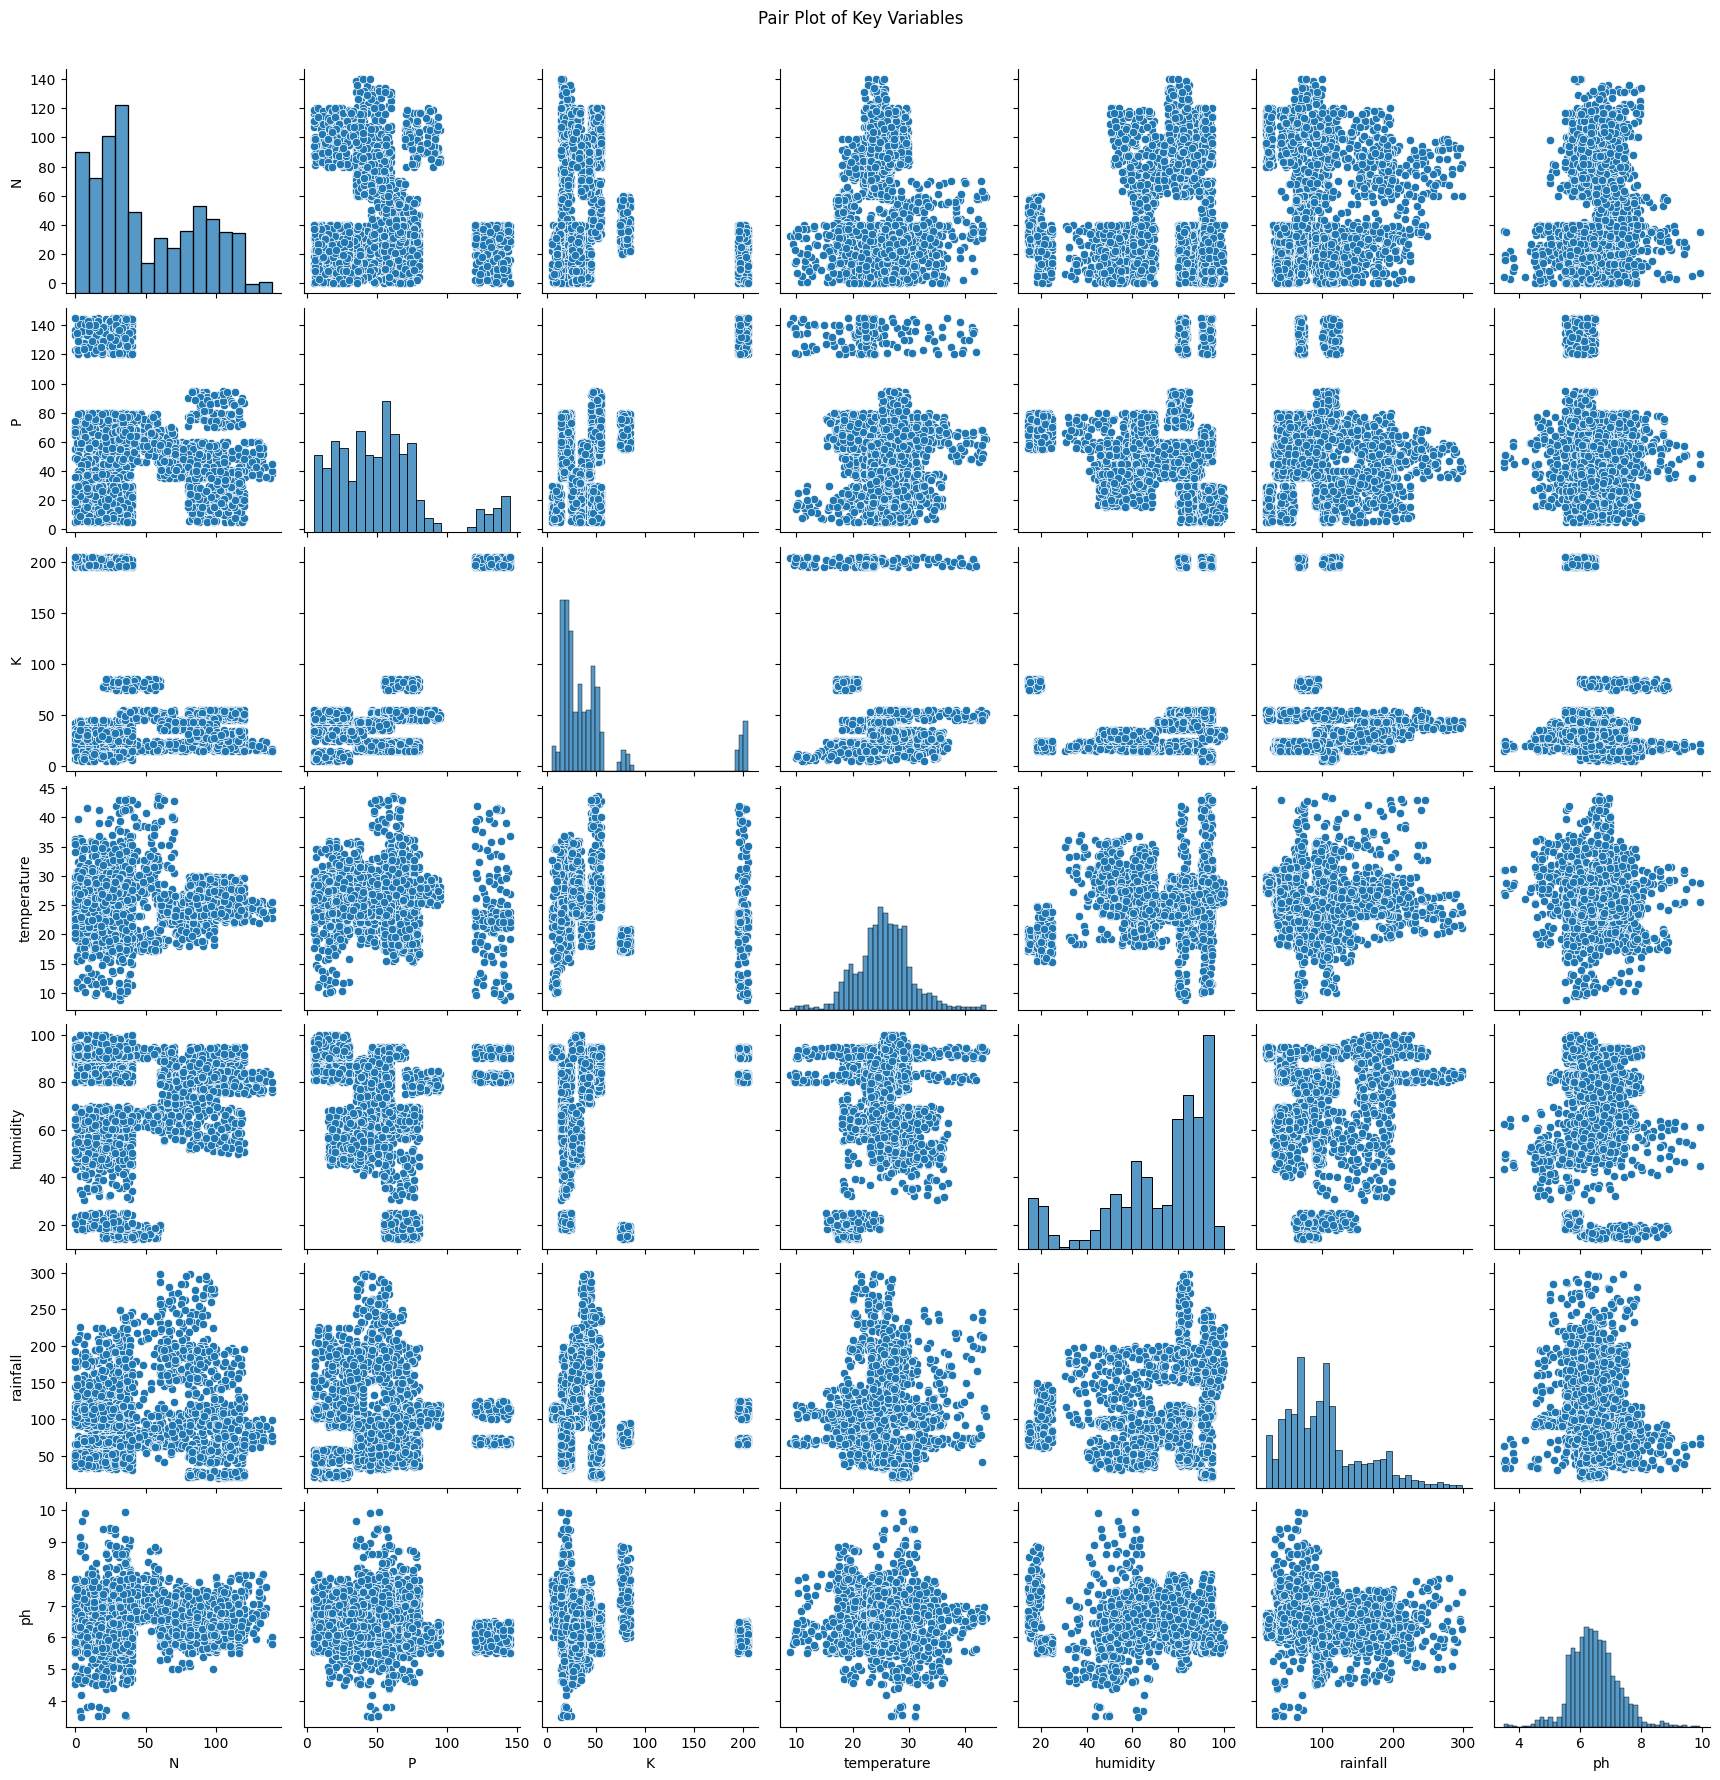

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pair plot to visualize relationships between numerical variables
sns.pairplot(x[['N', 'P', 'K', 'temperature', 'humidity', 'rainfall', 'ph']])
plt.suptitle('Pair Plot of Key Variables', y=1.02)
plt.show()

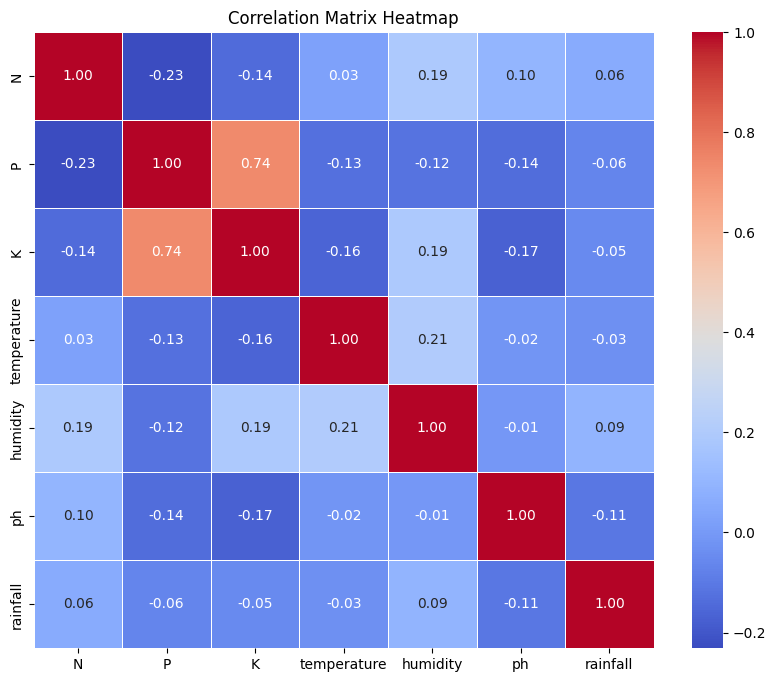

In [41]:
correlation_matrix = x.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

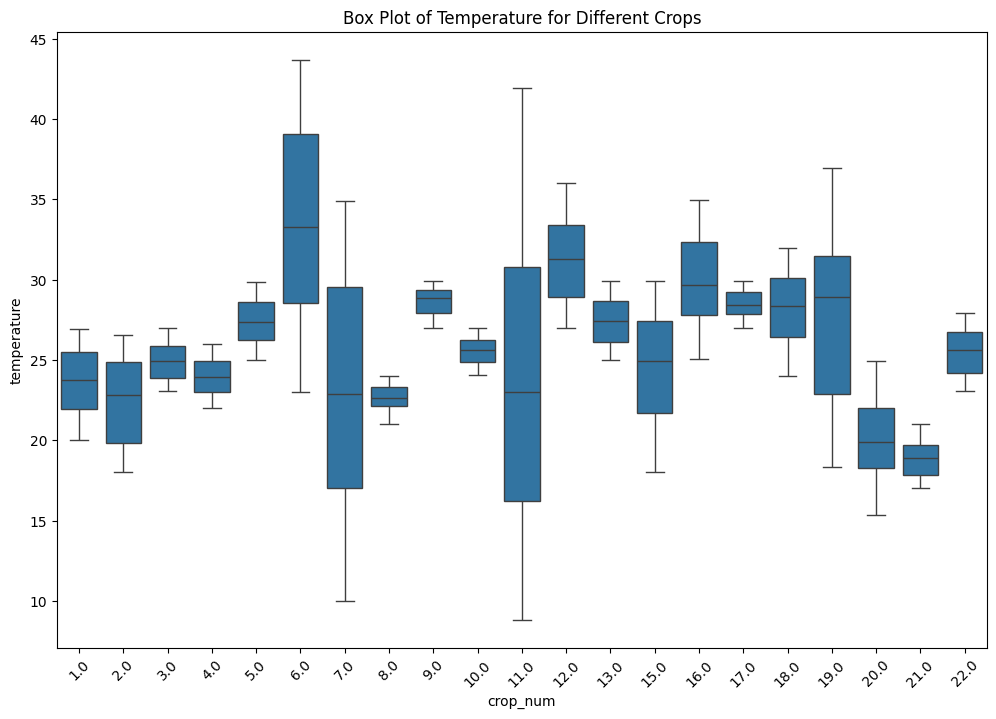

In [44]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='crop_num', y='temperature', data=crop)
plt.title('Box Plot of Temperature for Different Crops')
plt.xticks(rotation=45)
plt.show()


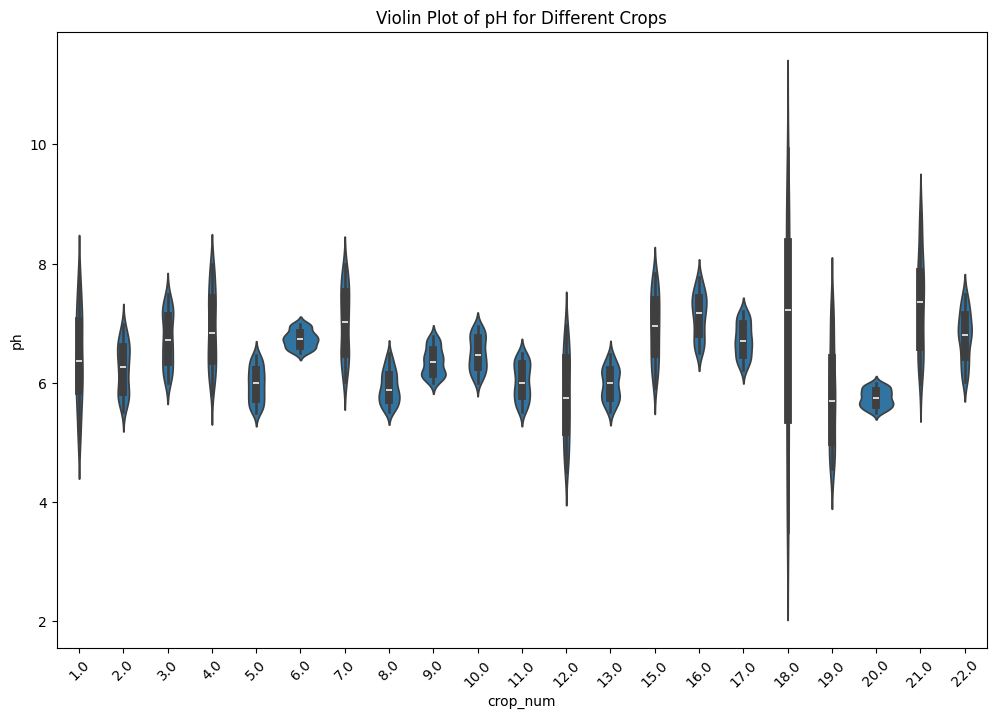

In [45]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='crop_num', y='ph', data=crop)
plt.title('Violin Plot of pH for Different Crops')
plt.xticks(rotation=45)
plt.show()

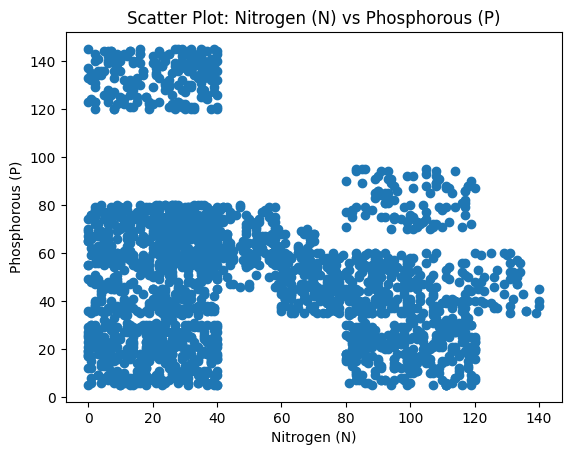

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Scatter plot for 'N' vs 'P'
plt.scatter(x['N'], x['P'])
plt.title('Scatter Plot: Nitrogen (N) vs Phosphorous (P)')
plt.xlabel('Nitrogen (N)')
plt.ylabel('Phosphorous (P)')
plt.show()

# Repeat for other pairs as needed


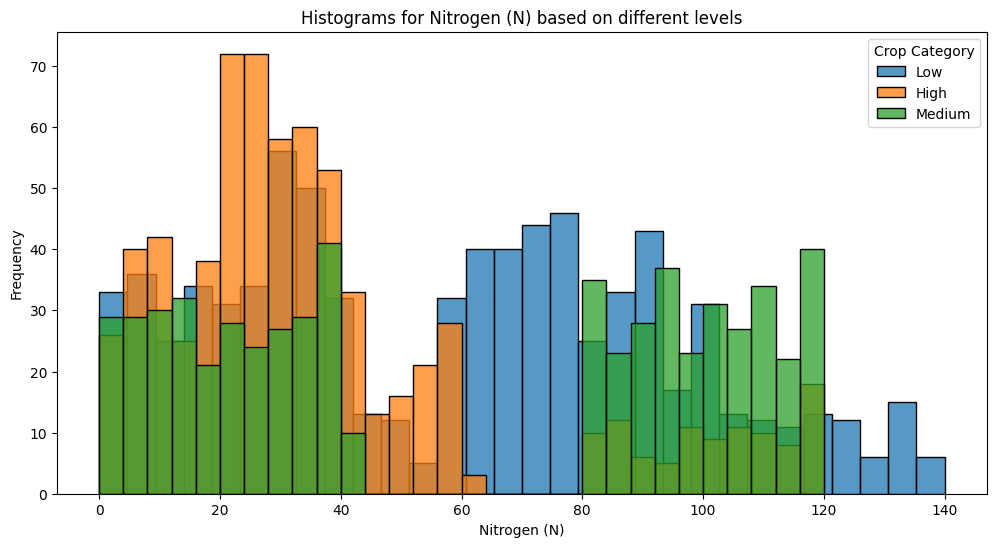

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'x' is your feature matrix DataFrame and 'y' is your target variable
# Add a categorical variable to represent different levels (for example, 'crop_num')
x['category'] = pd.cut(y, bins=3, labels=['Low', 'Medium', 'High'])

# Plot histograms based on different levels of the categorical variable
plt.figure(figsize=(12, 6))
for category in x['category'].unique():
    sns.histplot(x[x['category'] == category]['N'], bins=30, kde=False, label=category)

plt.title('Histograms for Nitrogen (N) based on different levels')
plt.xlabel('Nitrogen (N)')
plt.ylabel('Frequency')
plt.legend(title='Crop Category')
plt.show()


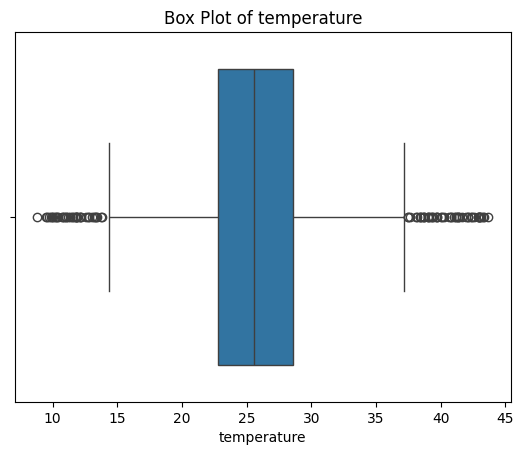

In [48]:

sns.boxplot(x=crop['temperature'])
plt.title('Box Plot of temperature')
plt.show()


In [21]:
from scipy.stats import zscore
z_scores = zscore(crop['temperature'])
threshold = 3
outliers = crop['temperature'][abs(z_scores) > threshold]


In [22]:

Q1 = crop['temperature'].quantile(0.25)
Q3 = crop['temperature'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_iqr = crop['temperature'][(crop['temperature'] < lower_bound) | (crop['temperature'] > upper_bound)]


In [23]:
from sklearn.impute import SimpleImputer

# Assuming 'x_train', 'x_test', 'y_train', 'y_test' are your datasets

# Handle NaN values in y_train using SimpleImputer
imputer_y = SimpleImputer(strategy='mean')
y_train_imputed = imputer_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()

# Handle NaN values in y_test using SimpleImputer
y_test_imputed = imputer_y.transform(y_test.values.reshape(-1, 1)).flatten()

# Continue with your model training and evaluation


NameError: name 'y_train' is not defined

In [54]:
# Check for NaN values in x_train
print("NaN values in x_train:")
print(x_train.isnull().sum())

# Check for NaN values in x_test
print("\nNaN values in x_test:")
print(x_test.isnull().sum())

# Check for NaN values in y_train
print("\nNaN values in y_train:")
print(y_train.isnull().sum())

# Check for NaN values in y_test
print("\nNaN values in y_test:")
print(y_test.isnull().sum())

NaN values in x_train:


AttributeError: 'numpy.ndarray' object has no attribute 'isnull'

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Create a mask to identify NaN values in y_train
mask_train = np.isnan(y_train)

# Replace NaN values with 0 (or any other suitable value)
y_train[mask_train] = 0

# Create a mask to identify NaN values in y_test
mask_test = np.isnan(y_test)

# Replace NaN values with 0 (or any other suitable value)
y_test[mask_test] = 0

models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier(),
}

for name, md in models.items():
    md.fit(x_train, y_train)
    y_pred = md.predict(x_test)

    print(f"{name} with accuracy: {accuracy_score(y_test, y_pred)}")


Logistic Regression with accuracy: 0.9636363636363636
Naive Bayes with accuracy: 0.9954545454545455
Support Vector Machine with accuracy: 0.9681818181818181
K-Nearest Neighbors with accuracy: 0.9590909090909091
Decision Tree with accuracy: 0.9818181818181818
Random Forest with accuracy: 0.9931818181818182
Bagging with accuracy: 0.990909090909091
AdaBoost with accuracy: 0.1409090909090909
Gradient Boosting with accuracy: 0.9818181818181818
Extra Trees with accuracy: 0.9


In [56]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)
accuracy_score(y_test,y_pred)

0.9931818181818182

predictive system

In [83]:
def recommendation(N,P,K,temperature,humidity,ph,rainfall):
 features= np.array([[N,P,K,temperature,humidity,ph,rainfall]])
 prediction=rfc.predict(features).reshape(1,-1)

 return prediction[0]

In [87]:
N=88
P=40
K=47
temperature=20.87974
humidity=82.00274
ph=100
rainfall=202.9355
predict=recommendation(N,P,K,temperature,humidity,ph,rainfall)

crop_dict = {
    1: "Rice", 2: "Maize", 3: "Jute", 4: "Cotton", 5: "Coconut", 6: "Papaya",
    7: "Orange", 8: "Apple", 9: "Muskmelon", 10: "Watermelon", 11: "Grapes",
    12: "Mango", 13: "Banana", 14: "Pomegranate", 15: "Lentil", 16: "Blackgram",
    17: "Mungbean", 18: "Mothbeans", 19: "Pigeonpeas", 20: "Kidneybeans",
    21: "Chickpea", 22: "Coffee"
}

if predict[0] in crop_dict:
  crop=crop_dict[predict[0]]
  print("{} is a best crop to be cultivated".format(crop))
else:
  print("sorry we are not able to recommend a proper crop for this environment")


Predicted Class: [8.]
Apple is a best crop to be cultivated


In [80]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Assuming rfc is your trained RandomForestClassifier
rfc.fit(x_train, y_train)
y_train_pred = rfc.predict(x_train)

# Evaluate on the training set
print(f"Training Accuracy: {accuracy_score(y_train, y_train_pred)}")
print("Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred))


Training Accuracy: 1.0
Confusion Matrix:
[[77  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 81  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 79  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 77  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 83  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 73  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 77  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 86  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 77  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 83  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 81  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 86  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 81  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 79  0  0  0  0  0  0 

In [81]:
def recommendation(N, P, K, temperature, humidity, ph, rainfall):
    features = np.array([[N, P, K, temperature, humidity, ph, rainfall]])
    prediction = rfc.predict(features).reshape(1, -1)

    # Convert the predicted class to an integer
    predicted_class = int(prediction[0][0])
    print(f"Predicted Class: {predicted_class}")

    return predicted_class

# Test the recommendation function with sample inputs
predict = recommendation(N, P, K, temperature, humidity, ph, rainfall)

# Check if the predicted class exists in crop_dict
if predict in crop_dict:
    crop = crop_dict[predict]
    print(f"{crop} is a recommended crop for cultivation.")
else:
    print("Sorry, we are not able to recommend a proper crop for this environment.")


Predicted Class: 8
Apple is a recommended crop for cultivation.


In [85]:
def recommendation(N, P, K, temperature, humidity, ph, rainfall):
    features = np.array([[N, P, K, temperature, humidity, ph, rainfall]])
    prediction = rfc.predict(features).reshape(1, -1)

    print(f"Predicted Class: {prediction[0]}")

    return prediction[0]


In [88]:
# Test the recommendation function with sample inputs
predict = recommendation(N, P, K, temperature, humidity, ph, rainfall)

# Extract the value from the array
predicted_class = predict[0]

# Use the extracted value to get the crop name from the dictionary
predicted_crop = crop_dict.get(predicted_class)

if predicted_crop:
    print(f"Predicted Crop: {predicted_crop}")
else:
    print("Sorry, we are not able to recommend a proper crop for this environment.")


Predicted Class: [8.]
Predicted Crop: Apple


In [28]:
import pickle
pickle.dump(rfc,open('model.pkl','wb'))

In [24]:
import pandas as pd

# Assuming 'crop' is your DataFrame
crop = pd.read_csv('/content/drive/MyDrive/archive (3) (1)/Crop_recommendation.csv')  # Replace 'your_dataset.csv' with your actual dataset file

# Map crop names to numerical values
crop_dict = {
    'rice':1,
    'maize':2,
    'jute':3,
    'cotton':4,
    'coconut':5,
    'papaya':6,
    'orange':7,
    'apple':8,
    'muskmelon':9,
    'watermelon':10,
    'grapes':11,
    'mango':12,
    'banana':13,
    'pomegranate':14,
    'lentil':15,
    'blackgram':16,
    'mungbean':17,
    'mothbeans':18,
    'pigeonpeas':19,
    'kidneybeans':20,
    'chickpea':21,
    'coffee':22,
}

# Add a column 'crop_num' to represent numerical values of crops
crop['crop_num'] = crop['label'].map(crop_dict)

# Separate features (X) and target variable (y)
X = crop[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
y = crop['crop_num']


In [25]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming you have a DataFrame 'crop_data'
# Make sure 'crop_num' is the target variable representing crop labels

# Separate features (X) and target variable (y)
X = crop[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
y = crop['crop_num']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a RandomForestClassifier instance
rfc = RandomForestClassifier()

# Train the classifier
rfc.fit(x_train, y_train)

# Make predictions
y_pred = rfc.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# You can now use this model for crop recommendation as shown earlier
# For example:
N, P, K, temperature, humidity, ph, rainfall = 60,50, 10, 22, 100, 5.749914, 87.75954
features = [[N, P, K, temperature, humidity, ph, rainfall]]
prediction = rfc.predict(features)

# Map the prediction to crop name using the dictionary 'crop_dict'
crop_dict = {1: "Rice", 2: "Maize", 3: "Jute", 4: "Cotton", 5: "Coconut", 6: "Papaya", 7: "Orange",
             8: "Apple", 9: "Muskmelon", 10: "Watermelon", 11: "Grapes", 12: "Mango", 13: "Banana",
             14: "Pomegranate", 15: "Lentil", 16: "Blackgram", 17: "Mungbean", 18: "Mothbeans",
             19: "Pigeonpeas", 20: "Kidneybeans", 21: "Chickpea", 22: "Coffee"}

recommended_crop = crop_dict.get(prediction[0], "Unknown")
print(f"Recommended Crop: {recommended_crop}")


Accuracy: 0.9931818181818182
Recommended Crop: Maize


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [32]:
import pickle
pickle.dump(rfc,open('model.pkl','wb'))